In [2]:
! pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
! pip install --upgrade tensorflow

# Installing Keras
! pip install --upgrade keras

# Install other packages
! pip install --upgrade pip pandas numpy matplotlib sklearn

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-3jtkfmr1
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-3jtkfmr1
  Stored in directory: /tmp/pip-ephem-wheel-cache-pmq7s339/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
     |████████████████████████████████| 86.3MB 58kB/s  eta 0:00:01��██████████████████▊     | 72.1MB 2.8MB/s eta 0:00:06��██████████████████████████▊ | 82.8MB 2.8MB/s eta 0:00:02
     |████████████████████████████████| 71kB 23.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 22.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 12.1MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 8.9MB/s eta 0:00:019MB/s eta 0:00:01███████▌          | 2.6MB 8.9MB/s eta 0:00:010:01
     |████████████████████████████████| 450kB 33.6MB/s eta 0:00:01
     |████████████████████████████████| 81kB 24.2MB/s eta 0:00:01
     |██████████████████████████████

# Recurrent Neural Networks

calcular o preço das ações do google

In [3]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.optimizers import SGD

Using TensorFlow backend.


In [4]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularization
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='tanh'))
regressor.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularization
regressor.add(GRU(units = 50, return_sequences = True, activation='tanh'))
regressor.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularization
regressor.add(GRU(units = 50, return_sequences = True, activation='tanh'))
regressor.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularization
regressor.add(GRU(units = 50, activation='tanh'))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), 
                                loss='mean_squared_error')

In [8]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 75)

Epoch 1/50
1198/1198 [==============================] - 16s 13ms/step - loss: 0.1158
Epoch 2/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0435
Epoch 3/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0144
Epoch 4/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0056
Epoch 5/50
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0046
Epoch 6/50
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0042
Epoch 7/50
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0042
Epoch 8/50
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0042
Epoch 9/50
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0038
Epoch 10/50
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0037
Epoch 11/50
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0039
Epoch 12/50
1198/1198 [==============================] - 10s 9ms/step - l

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

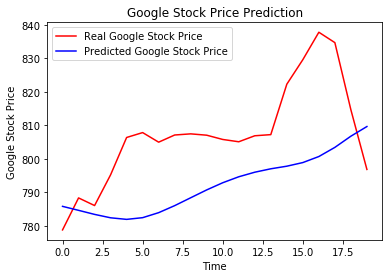

In [10]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM